# Diffie Hellman Key Exchange Algorithm

In [1]:
import random
p = 23

# Prime factors of p-1
primeFactors = [i for i in range(2, p-1) if (p-1)%i==0]
# print(primeFactors)
# print()

def checkPrime(value):
    if value==1:
        return None
    flag = 1
    i = 2
    while(flag and i<value-1):
        if value%i==0:
            flag = 0
        i+=1
    if(flag):
        return True
    else:
        return False

notEqualToOne = True
for i in range(1, p-1):
    if(checkPrime(i)):
        for x in primeFactors:
            temp = i**((p-1)/x)%p
            if temp!=1:
                notEqualToOne = True
            else:
                notEqualToOne = False
                break
        if(notEqualToOne):
            g = i

            x = random.randint(1,p)
            y = random.randint(1,p)

            R1 = g**x % p
            R2 = g**y % p

            print("R(s)",R1, R2)

            K1 = R2**x % p
            K2 = R1**y % p

            print("K(s)",K1, K2)
            print()

R(s) 15 10
K(s) 17 17

R(s) 7 8
K(s) 8 8

R(s) 18 11
K(s) 18 18

R(s) 2 4
K(s) 12 12

R(s) 10 11
K(s) 19 19



# Shamir's Secret Sharing Scheme

In [2]:
import random

key = 65
n = 4 # Shares

k = (n//2)+1 # Min Shares.

degreePol = k-1

# y = ax^(k-1) + bx + key
# a and b are random numbers

numberofShares = 4
a = random.randint(1,20)
b = random.randint(1,20)

a = 3 # Assumed
b = 5 # Assumed

values=[]
for x in range(1, numberofShares+1):
    values.append((x,a*x**(k-1) + b*x + key))
print(values)
values[2],values[3] = values[3],values[2]
values[1],values[2] = values[2], values[1]
print(values)
print()
numer, denom = [], []
for j in range(0, k):
    for m in range(0, k):
        tempNum = ""
        tempDenom = 1
        if(j!=m):
            tempNum+= f'(x-{values[m][0]})'
            tempDenom *= values[j][0]-values[m][0]
            # print(f'(x-{values[m][0]})/({values[j][0]-values[m][0]})', end=" ")
            numer.append(tempNum)
            denom.append(tempDenom)
        tempNum = ""
        tempDenom = 1
    print()

processedNum = []
processedDenom = []

for x in range(0,len(numer),2):
    print(f'{"*".join(numer[x:x+2:])} = {eval("*".join(numer[x:x+2:]).replace("x",""))}')
    processedNum.append(eval("*".join(numer[x:x+2:]).replace("x","")))
    processedDenom.append(denom[x] * denom[x+1])

print(processedNum)
print(processedDenom)

re_constructKey = 0
for index in range(len(processedNum)):
    re_constructKey+= (values[index][1] * processedNum[index])/processedDenom[index]
print()
print()
print(numer, denom, sep="\n")


print()
print(f'Re-constructed Key = {int(re_constructKey)}')

[(1, 73), (2, 87), (3, 107), (4, 133)]
[(1, 73), (4, 133), (2, 87), (3, 107)]




(x-4)*(x-2) = 8
(x-1)*(x-2) = 2
(x-1)*(x-4) = 4
[8, 2, 4]
[3, 6, -2]


['(x-4)', '(x-2)', '(x-1)', '(x-2)', '(x-1)', '(x-4)']
[-3, -1, 3, 2, 1, -2]

Re-constructed Key = 65


In [3]:
# General Code

import random

key = 65

# y = ax^(k-1) + bx + key
# a and b are random numbers

numberofShares = 4

if numberofShares>1:
    k = (numberofShares//2)+1 # Min Shares.
    degreePol = k-1

    a, b = 3, 5

    values=[]
    for x in range(1, numberofShares+1):
        values.append((x,a*x**(k-1) + b*x + key))
    print(values)
    values[2],values[3] = values[3],values[2]
    values[1],values[2] = values[2], values[1]
    print(values)
    print()

    re_constructKey = 0
    for j in range(0, k):
        multiNum, multiDen = 1, 1
        for m in range(0, k):
            if(j!=m):
                multiNum*=(-values[m][0])
                multiDen*=values[j][0]-values[m][0]
        re_constructKey+=(values[j][1] * multiNum)/multiDen
    print()
    print(f'Re-constructed Key = {int(re_constructKey)}')
else:
    print("Number of Shares > 1")

[(1, 73), (2, 87), (3, 107), (4, 133)]
[(1, 73), (4, 133), (2, 87), (3, 107)]


Re-constructed Key = 65


![WhatsApp Image 2024-09-28 at 23.46.58_4714327f.jpg](<attachment:WhatsApp Image 2024-09-28 at 23.46.58_4714327f.jpg>)
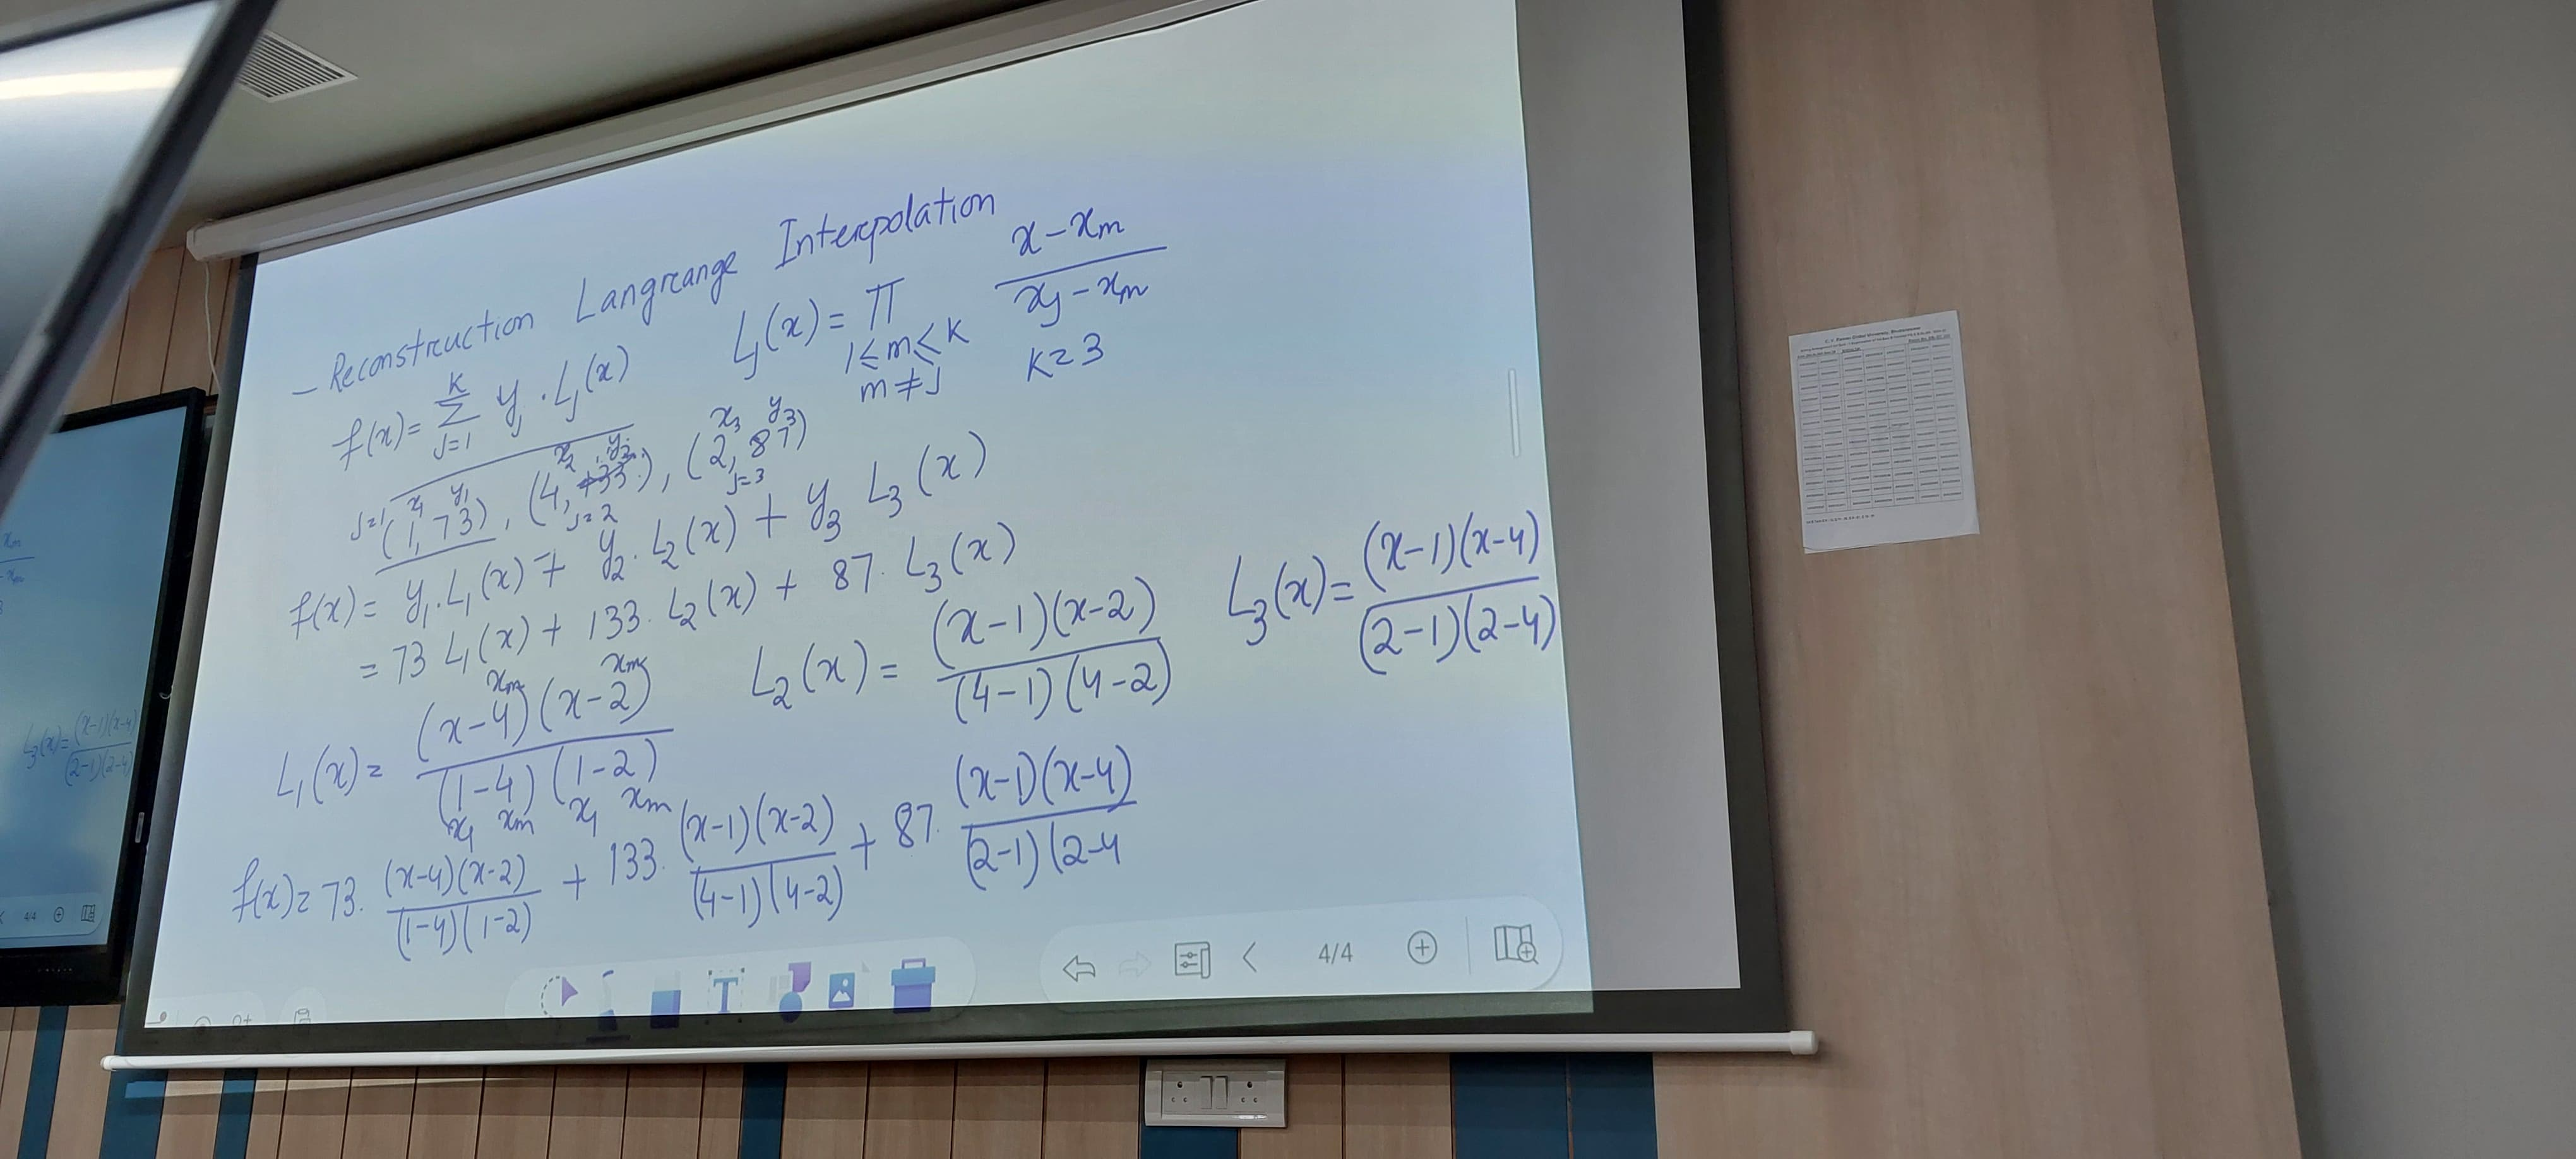

In [4]:
# General Code

import random

key = int(input("Enter Key: "))

# y = ax^(k-1) + bx + key
# a and b are random numbers

numberofShares = int(input("Enter the number of shares"))

if numberofShares>1:
    k = (numberofShares//2)+1 # Min Shares.
    degreePol = k-1

    a = random.randint(1,20)
    b = random.randint(1,20)

    # a, b = 3, 5

    values=[]
    for x in range(1, numberofShares+1):
        values.append((x,a*x**(k-1) + b*x + key))
    print(values)
    print()

    re_constructKey = 0
    for j in range(0, k):
        multiNum, multiDen = 1, 1
        for m in range(0, k):
            if(j!=m):
                multiNum*=(-values[m][0])
                multiDen*=values[j][0]-values[m][0]
        re_constructKey+=(values[j][1] * multiNum)/multiDen
    print()
    print(f'Re-constructed Key = {int(re_constructKey)}')
else:
    print("Number of Shares > 1")

Enter Key:  17
Enter the number of shares 12


[(1, 42), (2, 625), (3, 6626), (4, 36945), (5, 140722), (6, 420017), (7, 1058970), (8, 2359441), (9, 4783130), (10, 9000177), (11, 15944242), (12, 26874065)]


Re-constructed Key = 17
